# 1. Data 확인

In [53]:
import pandas as pd

In [96]:
data=pd.read_csv("./wdbc.data", header=None)
cols=['id','class']
feature_list=["radius","texture","perimeter","area","smoothness","compactness","concavity","concave_points","symmetry","fractal_dim"]
for first in ['mean_','se_','worst_']:
    for item in feature_list:
        cols.append(first+item)
data.columns=cols
data=data.drop('id',axis=1)

In [97]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dim,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [98]:
data.describe(include=['O'])

,class
count,569
unique,2
top,B
freq,357


## 1-2) categorical data 처리

In [99]:
from sklearn import preprocessing

In [100]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(data['class'])
data['class']=label_encoder.transform(data['class'])

# 2. 산점도

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

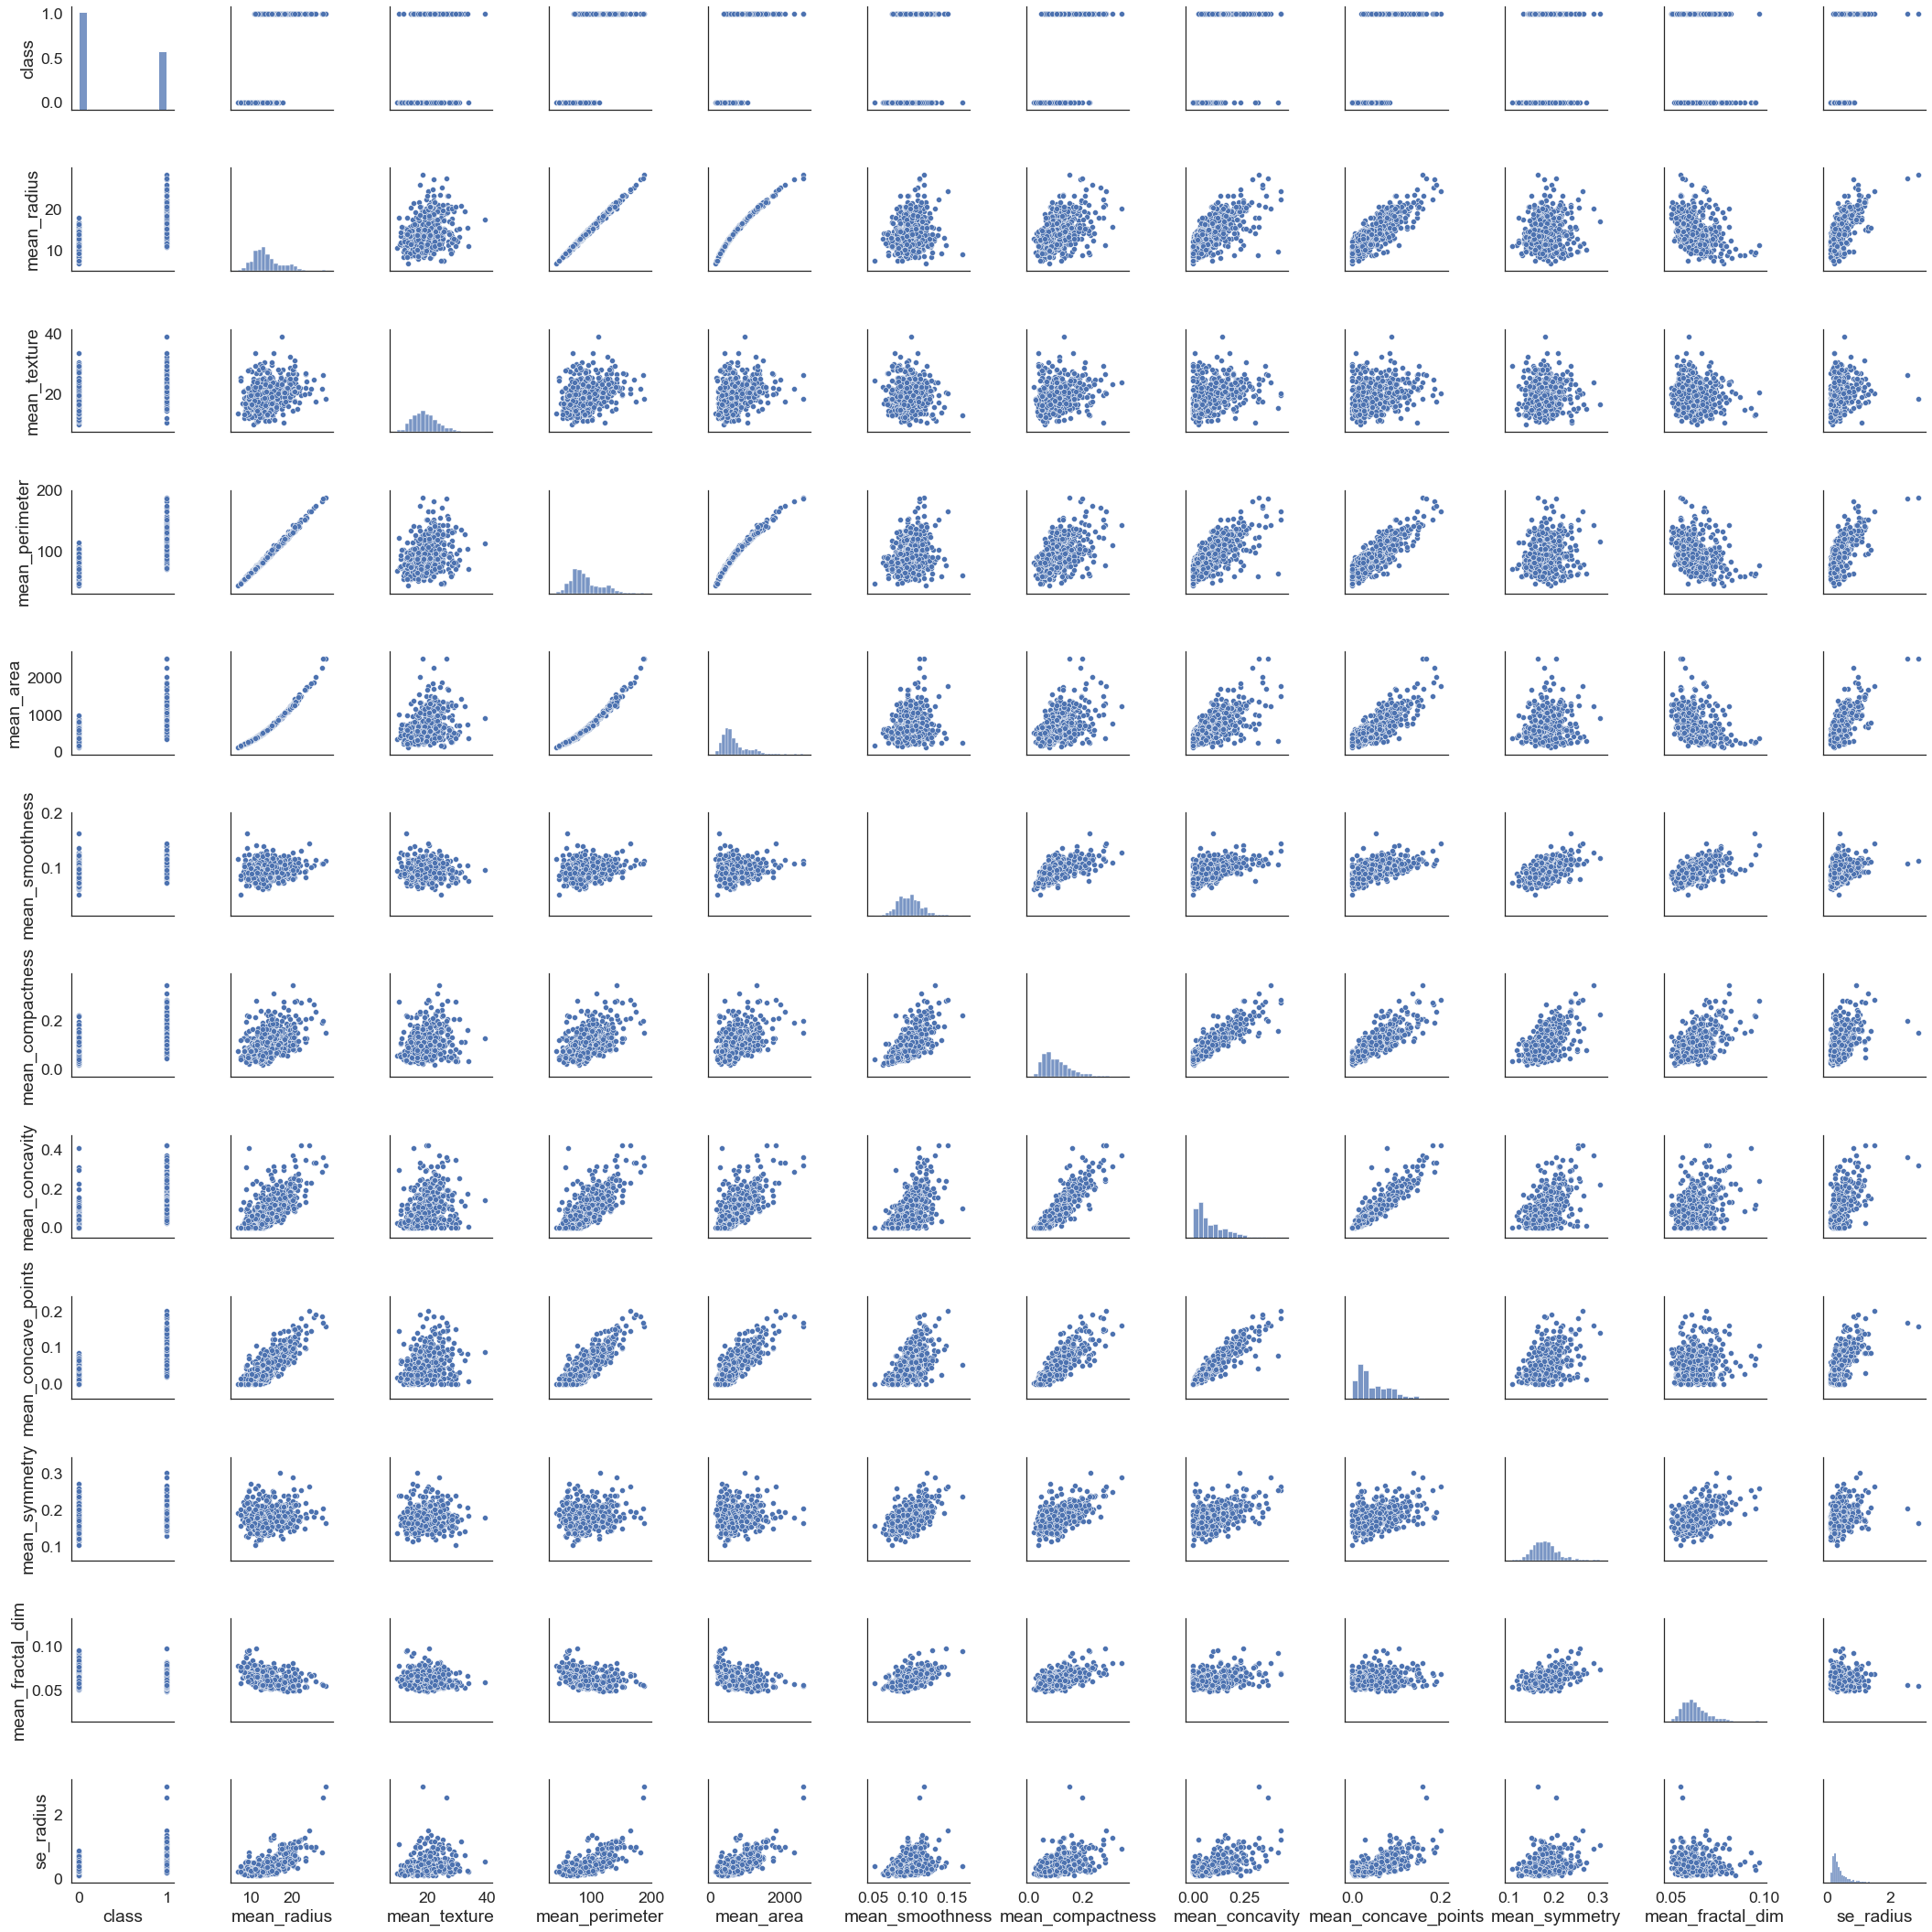

In [103]:
sns.pairplot(data.iloc[:,:2+len(feature_list)],diag_kind='hist',  palette=sns.color_palette("Set2"))
plt.show()

# 3. SET 분할

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X=data.drop('class',axis=1)
y=data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

# 4. 모델링

In [106]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [107]:
logistic_reg=LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred = logistic_reg.predict(X_test)

acc_logistic = round(logistic_reg.score(X_train, y_train)*100, 2)
print(acc_logistic)

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logistic_reg.coef_))], axis = 1)
coefficients

94.97


C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,0
0,mean_radius,-1.979034
1,mean_texture,-0.035123
2,mean_perimeter,0.016233
3,mean_area,0.003254
4,mean_smoothness,0.134199
5,mean_compactness,0.379115
6,mean_concavity,0.566540
7,mean_concave_points,0.322788
8,mean_symmetry,0.195209
9,mean_fractal_dim,0.019807
